In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
df=pd.read_csv('MissingMigrants-Global-2019-05-09T10-44-32.csv')
df.head()

,Web ID,Region of Incident,Reported Date,Reported Year,Reported Month,Number Dead,Minimum Estimated Number of Missing,Total Dead and Missing,Number of Survivors,Number of Females,Number of Males,Number of Children,Cause of Death,Location Description,Information Source,Location Coordinates,Migration Route,URL,UNSD Geographical Grouping,Source Quality
0,51674,Central America,"May 05, 2019",2019,May,2.0,NaN,2,NaN,1.0,1.0,2.0,Vehicle Accident,Between Comitán de Domínguez and San Cristóbal...,El Universal,"16.416331403204, -92.259368268791",NaN,https://bit.ly/2JkgdP1,Central America,1
1,51676,US-Mexico Border,"May 05, 2019",2019,May,1.0,NaN,1,NaN,1.0,NaN,NaN,Drowning,"Río Bravo, near Calle Hidalgo, Nuevo Laredo, T...",Vox Pópuli,"27.495635827252, -99.489473063115",NaN,http://bit.ly/2ZYQcuq,Central America,1
2,51673,Mediterranean,"May 04, 2019",2019,May,1.0,NaN,1,NaN,1.0,NaN,NaN,Hypothermia,Body recovered 1 mile off the Port of Algecira...,"La Voz Digital, Europa Sur","36.076291184400, -5.363376372407",Western Mediterranean,"http://bit.ly/2ZZobmh, http://bit.ly/2H4f4cE",Uncategorized,3
3,51675,Central America,"May 04, 2019",2019,May,1.0,NaN,1,NaN,NaN,1.0,NaN,Hit by train,"Train tracks near Calzada Ignacio Zaragoza, in...","El Sol de Puebla, La Prensa","19.072646808516, -98.176404241764",NaN,"http://bit.ly/2Viy9Rd, http://bit.ly/2DQrdjn",Uncategorized,3
4,51672,Mediterranean,"May 03, 2019",2019,May,9.0,3.0,12,5.0,4.0,NaN,5.0,Drowning,"Off the coast of the island of Ciplak, provinc...",Turkish Coast Guard via IOM Turkey,"39.290756355278, 26.576426980349",Eastern Mediterranean,"http://bit.ly/2ViCns0, http://bit.ly/2V5hITc",Uncategorized,5


## Descriptive Statistics

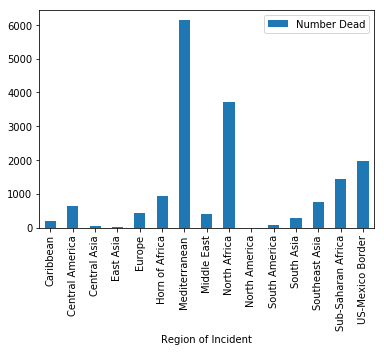

In [27]:
df.groupby('Region of Incident')['Number Dead'].sum().to_frame().plot(kind = "bar")

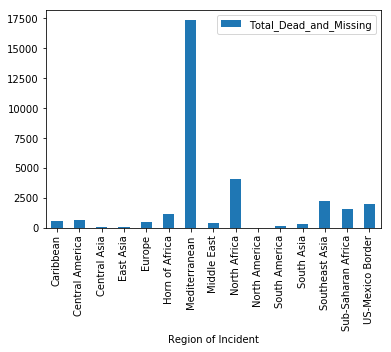

In [28]:
df.rename(columns={'Total Dead and Missing':'Total_Dead_and_Missing'}, 
                 inplace=True)
df['Total_Dead_and_Missing'] = pd.to_numeric(df.Total_Dead_and_Missing, errors='coerce')
df.groupby('Region of Incident')['Total_Dead_and_Missing'].sum().to_frame().plot(kind = "bar")

In [29]:
df['Number of Survivors'] = df['Number of Survivors'].fillna(0)
Total = df['Number of Survivors'].sum()
Total

47927.0

In [9]:
Survival = df.groupby(['Reported Month']).agg({'Number of Survivors': 'sum'})
Survival

,Number of Survivors
Reported Month,
Apr,2854.0
Aug,3733.0
Dec,3304.0
Feb,2320.0
Jan,4270.0
Jul,3645.0
Jun,8489.0
Mar,4209.0
May,5081.0


In [10]:
Survival['Survival Rate']=(Survival['Number of Survivors']/Total)*100
Survival=Survival.reset_index()
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
Survival['Reported Month'] = pd.Categorical(Survival['Reported Month'], categories=months, ordered=True)
Survival.sort_values('Reported Month')

,Reported Month,Number of Survivors,Survival Rate
4,Jan,4270.0,8.909383
3,Feb,2320.0,4.840695
7,Mar,4209.0,8.782106
0,Apr,2854.0,5.954890
8,May,5081.0,10.601540
6,Jun,8489.0,17.712354
5,Jul,3645.0,7.605316
1,Aug,3733.0,7.788929
11,Sep,5830.0,12.164333
10,Oct,2518.0,5.253824


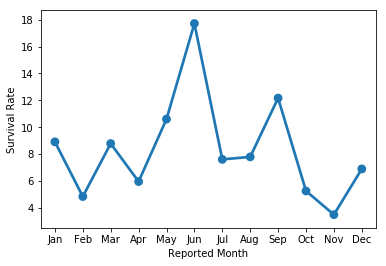

In [11]:
import seaborn as sns

sns.pointplot(x="Reported Month", y="Survival Rate", data=Survival)

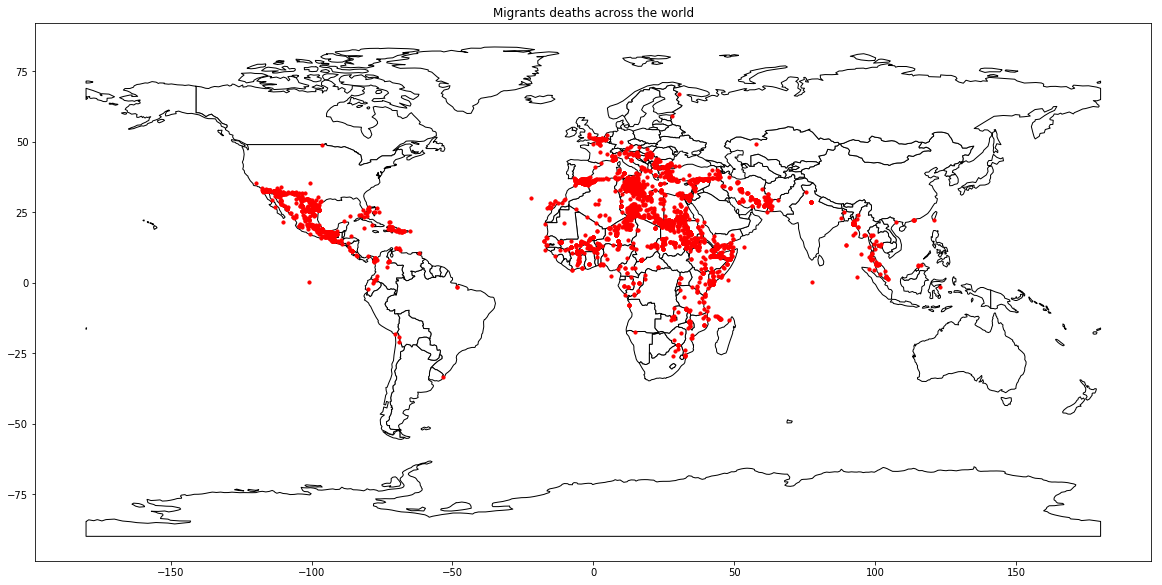

In [12]:
import geopandas 
from shapely.geometry import Point
df[['lon','lat']] = df['Location Coordinates'].str.split(", ",expand=True,)
df.lat=df.lat.astype('float64')
df.lon=df.lon.astype('float64')
df['Coordinates'] = list(zip(df.lat, df.lon))
df['Coordinates'] = df['Coordinates'].apply(Point)
gdf = geopandas.GeoDataFrame(df, geometry='Coordinates')
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

ax = world.plot(
    color='white', edgecolor='black',figsize=(20,25))

# We can now plot our GeoDataFrame.
gdf.plot(ax=ax, color='red',markersize=10)
ax.set_title('Migrants deaths across the world')
plt.show()


In [13]:
Region_wise = df.groupby(['Migration Route','Reported Month']).agg({'Number of Survivors': 'sum'})
Region_wise['Survival Rate']=(Region_wise['Number of Survivors']/Total)*100
Region_wise=Region_wise.reset_index()
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
Region_wise['Reported Month'] = pd.Categorical(Region_wise['Reported Month'], categories=months, ordered=True)
Region_wise=Region_wise.sort_values('Reported Month')
Region_wise.head()

,Migration Route,Reported Month,Number of Survivors,Survival Rate
55,"From Haiti to Dajabon, Dominican Republic",Jan,0.0,0.000000
47,Eastern Mediterranean,Jan,496.0,1.034907
3,Calais to United Kingdom,Jan,2.0,0.004173
79,Western African,Jan,20.0,0.041730
38,Darien Gap,Jan,15.0,0.031298


In [14]:
pivot_df = Region_wise.pivot(index='Reported Month', columns='Migration Route', values='Survival Rate')
pivot_df

Migration Route,Calais to United Kingdom,Caribbean to Central America,Central America to US,Central Mediterranean,Darien Gap,Dominican Republic to Puerto Rico,Eastern Mediterranean,"From Haiti to Dajabon, Dominican Republic",Horn Africa to Yemen,Italy to France,Malaysia to Indonesia,Venezuela to Curaçao,Western African,Western Balkans,Western Mediterranean
Reported Month,,,,,,,,,,,,,,,
Jan,0.004173,NaN,0.112671,5.813007,0.031298,NaN,1.034907,0.0,0.179440,NaN,NaN,NaN,0.041730,0.006260,0.684374
Feb,0.000000,NaN,0.102239,2.347320,NaN,0.006260,0.146055,NaN,0.198218,0.0,0.004173,NaN,0.000000,0.000000,0.273332
Mar,0.000000,NaN,0.600914,6.405575,NaN,NaN,0.319236,NaN,0.000000,0.0,NaN,NaN,0.102239,0.093893,0.210737
Apr,NaN,NaN,0.047990,3.388487,NaN,NaN,0.592568,NaN,NaN,NaN,NaN,NaN,0.000000,0.098066,0.223256
May,0.000000,NaN,0.087633,9.357982,0.000000,NaN,0.035471,NaN,NaN,0.0,NaN,NaN,NaN,0.004173,0.118931
Jun,0.000000,NaN,0.335928,16.118263,NaN,0.010433,0.148142,NaN,0.081374,0.0,NaN,NaN,0.000000,0.027125,0.225343
Jul,0.012519,NaN,0.125190,6.069648,NaN,NaN,0.354706,NaN,0.333841,NaN,NaN,NaN,NaN,0.000000,0.214910
Aug,0.000000,NaN,0.091806,5.700336,0.000000,NaN,0.312976,NaN,0.857554,0.0,NaN,NaN,0.164834,0.031298,0.221170
Sep,0.000000,NaN,0.171094,9.188975,0.000000,NaN,1.097502,NaN,0.000000,0.0,NaN,NaN,NaN,0.012519,0.584222


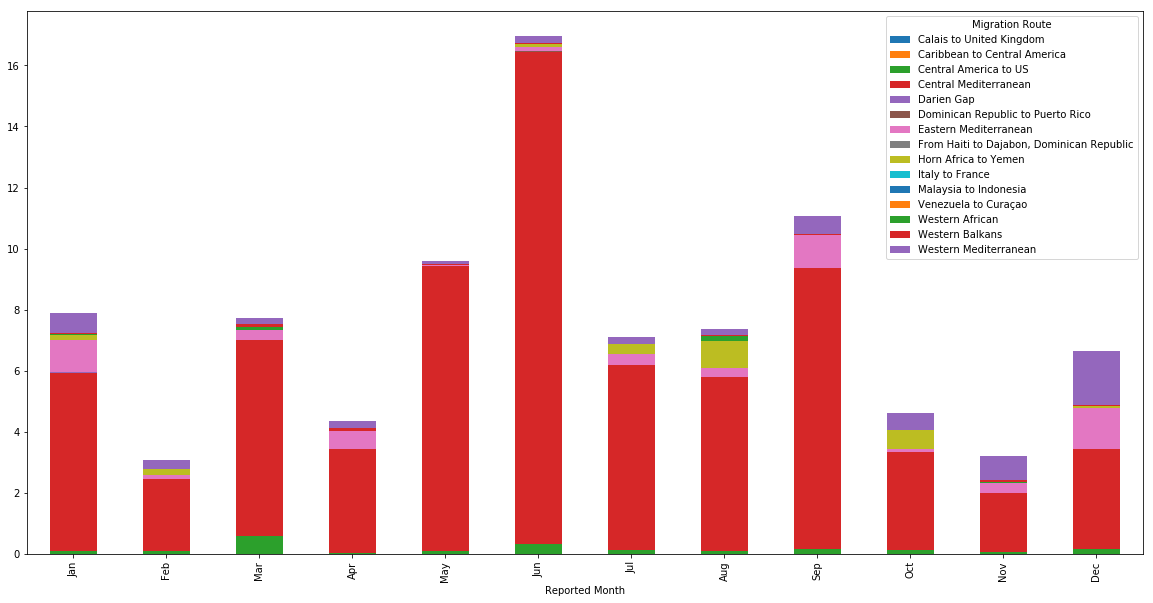

In [15]:
pivot_df.plot.bar(stacked=True, figsize=(20,10))

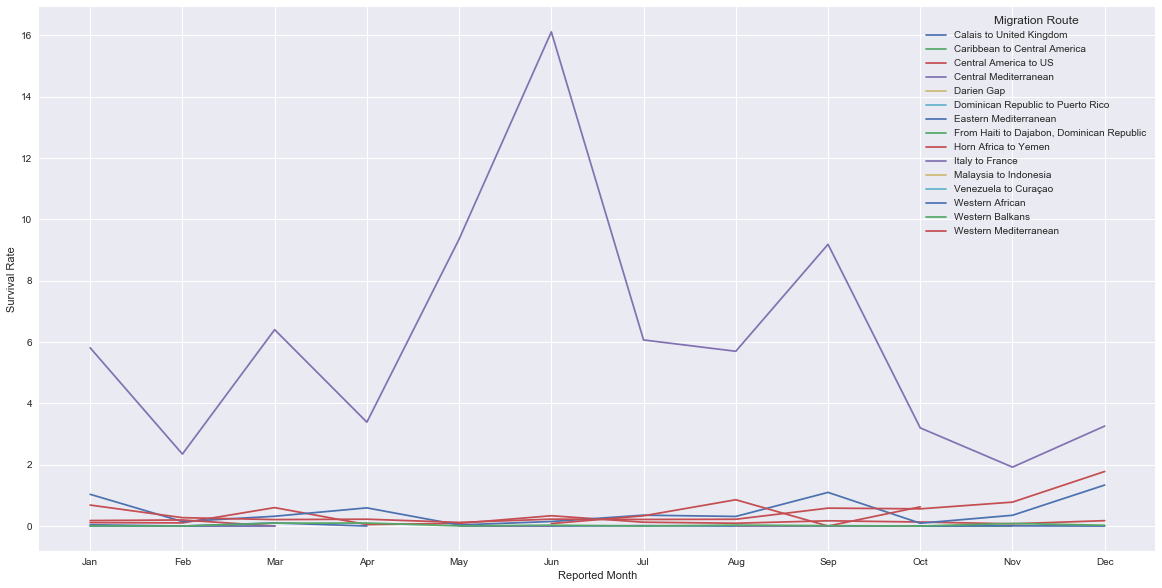

In [202]:
pivot_df.plot.line(stacked=False,figsize=(20,10))
plt.xticks(np.arange(len(pivot_df.index)), pivot_df.index)
plt.ylabel('Survival Rate')
plt.savefig('lineplot.png')

## Deaths per incident

In [19]:
incident=df[(df['Region of Incident'] =='Mediterranean')]
incident['Reported Date'] = pd.to_datetime(incident['Reported Date'])
Region_wise_inc = incident.groupby(['Migration Route','Reported Date']).agg({'Total_Dead_and_Missing': 'sum'})
Region_wise_inc=Region_wise_inc.reset_index()
Region_wise_inc.head()

/Users/riyachanduka/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Migration Route,Reported Date,Total_Dead_and_Missing
0,Central Mediterranean,2014-02-17,2.0
1,Central Mediterranean,2014-02-27,7.0
2,Central Mediterranean,2014-03-17,1.0
3,Central Mediterranean,2014-04-09,1.0
4,Central Mediterranean,2014-04-16,9.0


In [20]:
pivot_df = Region_wise_inc.pivot(index='Reported Date', columns='Migration Route', values='Total_Dead_and_Missing')
pivot_df.head()

Migration Route,Central Mediterranean,Eastern Mediterranean,Western Mediterranean
Reported Date,,,
2014-01-19,NaN,12.0,NaN
2014-02-06,NaN,NaN,15.0
2014-02-17,2.0,NaN,NaN
2014-02-27,7.0,NaN,NaN
2014-03-17,1.0,NaN,NaN


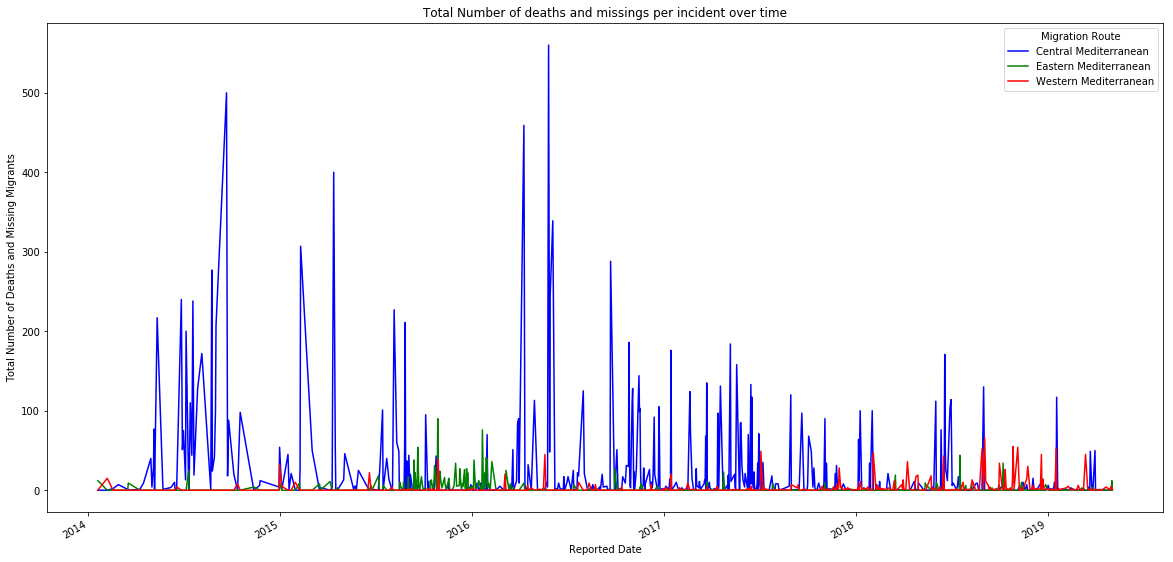

In [83]:
pivot_df=pivot_df.fillna(0)
pivot_df.plot.line(stacked=False,figsize=(20,10), color = ['b', 'g','r'])
#plt.xticks(np.arange(len(pivot_df.index)), pivot_df.index)
plt.title('Total Number of deaths and missings per incident over time')
plt.ylabel('Total Number of Deaths and Missing Migrants')
plt.savefig('Total Number of Deaths and Missing Migrants.png')

##  Survival Rate per Incident

In [22]:
Region_wise_survival = incident.groupby(['Migration Route','Reported Date']).agg({'Number of Survivors': 'sum'})
Region_wise_survival=Region_wise_survival.reset_index()
pivot_df_sur = Region_wise_survival.pivot(index='Reported Date', columns='Migration Route', values='Number of Survivors')
pivot_df_sur.head()

Migration Route,Central Mediterranean,Eastern Mediterranean,Western Mediterranean
Reported Date,,,
2014-01-19,NaN,0.0,NaN
2014-02-06,NaN,NaN,0.0
2014-02-17,121.0,NaN,NaN
2014-02-27,0.0,NaN,NaN
2014-03-17,0.0,NaN,NaN


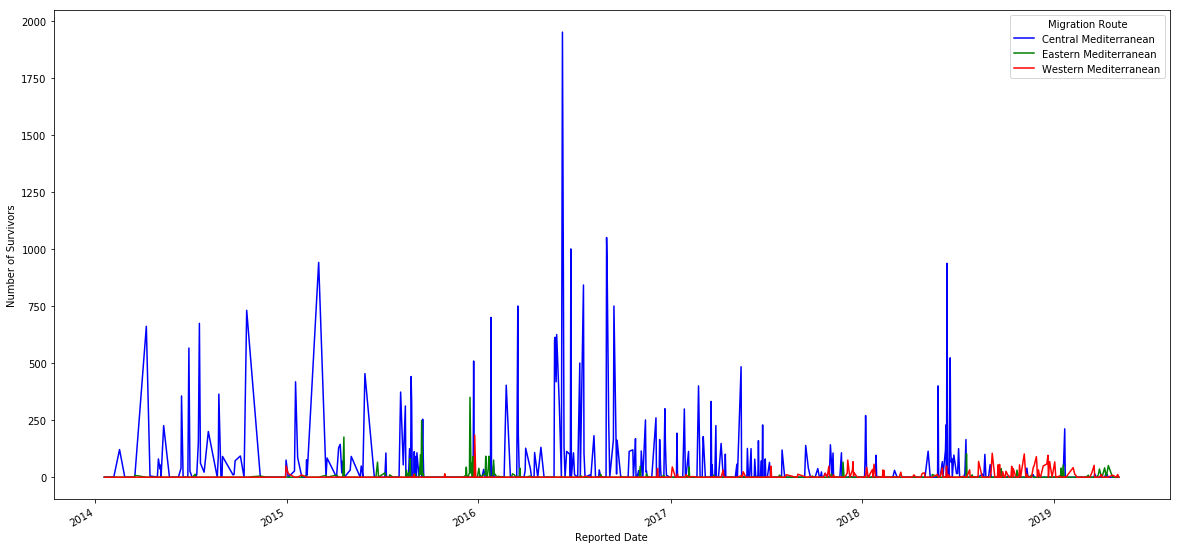

In [23]:
pivot_df_sur=pivot_df_sur.fillna(0)
pivot_df_sur.plot.line(stacked=False,figsize=(20,10),color = ['b', 'g','r'])
plt.ylabel('Number of Survivors')
plt.savefig('Total Number of Survivors.png')

## Inferential Statistics

## Anova Test

In [25]:
import scipy.stats as stats
import researchpy as rp
import statsmodels.api as sm
from statsmodels.formula.api import ols

/Users/riyachanduka/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [30]:
df=df[(df['Region of Incident'] =='Mediterranean')]

In [33]:
df=df[['Reported Month','Total_Dead_and_Missing']]

In [37]:
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
df['Reported Month'] = pd.Categorical(df['Reported Month'], categories=months, ordered=True)

In [35]:
rp.summary_cont(df['Total_Dead_and_Missing'])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Total_Dead_and_Missing,998.0,17.362725,46.059256,1.45798,14.501663,20.223788


In [38]:
rp.summary_cont(df['Total_Dead_and_Missing'].groupby(df['Reported Month']))

,N,Mean,SD,SE,95% Conf.,Interval
Reported Month,,,,,,
Jan,105,11.133333,25.270866,2.466184,6.276429,15.990237
Feb,62,14.161290,43.738115,5.554746,3.185110,25.137470
Mar,77,11.688312,22.645587,2.580704,6.596963,16.779661
Apr,67,24.373134,74.110654,9.054057,6.493248,42.253020
May,72,31.833333,81.361998,9.588603,12.907784,50.758883
Jun,95,20.084211,48.760959,5.002769,10.226765,29.941656
Jul,65,25.784615,41.371598,5.131515,15.648574,35.920657
Aug,68,23.750000,52.699196,6.390716,11.131066,36.368934
Sep,80,22.575000,68.150945,7.619507,7.546543,37.603457


In [41]:
df.rename(columns={'Reported Month':'Reported_Month'}, 
                 inplace=True)

In [42]:
results = ols('Total_Dead_and_Missing ~ C(Reported_Month)', data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Total_Dead_and_Missing   R-squared:                       0.023
Model:                                OLS   Adj. R-squared:                  0.012
Method:                     Least Squares   F-statistic:                     2.115
Date:                    Mon, 20 May 2019   Prob (F-statistic):             0.0171
Time:                            19:12:16   Log-Likelihood:                -5226.2
No. Observations:                     998   AIC:                         1.048e+04
Df Residuals:                         986   BIC:                         1.054e+04
Df Model:                              11                                         
Covariance Type:                nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   11.1333      4.468      2.492      0.013       2.366      19.900
C(Reported_Month)[T.Feb]     3.0280      7.332      0.413      0.680     -11.360      17.416
C(Reported_Month)[T.Mar]     0.5550      6.868      0.081      0.936     -12.923      14.033
C(Reported_Month)[T.Apr]    13.2398      7.158      1.850      0.065      -0.807      27.287
C(Reported_Month)[T.May]    20.7000      7.005      2.955      0.003       6.954      34.446
C(Reported_Month)[T.Jun]     8.9509      6.482      1.381      0.168      -3.770      21.671
C(Reported_Month)[T.Jul]    14.6513      7.225      2.028      0.043       0.473      28.829
C(Reported_Month)[T.Aug]    12.6167      7.126      1.771      0.077      -1.367      26.600
C(Reported_Month)[T.Sep]    11.4417      6.794      1.684      0.092      -1.890      24.774
C(Reported_Month)[T.Oct]     0.3036      6.129      0.050      0.961     -11.725      12.332
C(Reported_Month)[T.Nov]     2.8444      6.576      0.433      0.665     -10.060      15.749
C(Reported_Month)[T.Dec]    -2.6435      6.430     -0.411      0.681     -15.261       9.974
==============================================================================
Omnibus:                     1183.018   Durbin-Watson:                   1.813
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           104781.385
Skew:                           6.032   Prob(JB):                         0.00
Kurtosis:                      51.726   Cond. No.                         11.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
aov_table = sm.stats.anova_lm(results, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(Reported_Month),4.874565e+04,11.0,2.114546,0.01714
Residual,2.066345e+06,986.0,NaN,NaN


In [44]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison(df['Total_Dead_and_Missing'], df['Reported_Month'])
mc_results = mc.tukeyhsd()
print(mc_results)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff lower upper reject
-----------------------------------------
 Apr    Aug     nan     nan   nan  False 
 Apr    Dec     nan     nan   nan  False 
 Apr    Feb     nan     nan   nan  False 
 Apr    Jan     nan     nan   nan  False 
 Apr    Jul     nan     nan   nan  False 
 Apr    Jun     nan     nan   nan  False 
 Apr    Mar     nan     nan   nan  False 
 Apr    May     nan     nan   nan  False 
 Apr    Nov     nan     nan   nan  False 
 Apr    Oct     nan     nan   nan  False 
 Apr    Sep     nan     nan   nan  False 
 Aug    Dec   -15.2602  nan   nan  False 
 Aug    Feb   -9.5887   nan   nan  False 
 Aug    Jan   -12.6167  nan   nan  False 
 Aug    Jul    2.0346   nan   nan  False 
 Aug    Jun   -3.6658   nan   nan  False 
 Aug    Mar   -12.0617  nan   nan  False 
 Aug    May    8.0833   nan   nan  False 
 Aug    Nov   -9.7722   nan   nan  False 
 Aug    Oct   -12.313   nan   nan  False 
 Aug    Sep    -1.175   n

/Users/riyachanduka/anaconda3/lib/python3.6/site-packages/statsmodels/sandbox/stats/multicomp.py:1281: RuntimeWarning: invalid value encountered in greater
  reject = st_range > q_crit
/Users/riyachanduka/anaconda3/lib/python3.6/site-packages/statsmodels/sandbox/stats/multicomp.py:1283: RuntimeWarning: invalid value encountered in greater
  reject2 = np.abs(meandiffs) > crit_int


## Two sample t-test

In [49]:
summer=['May','Jun','Jul','Aug','Sep']

In [56]:
df['Season_summer']=df.Reported_Month.isin(summer)

In [57]:
df.head()

,Reported_Month,Total_Dead_and_Missing,Season,Season_summer
2,May,1.0,True,True
4,May,12.0,True,True
5,May,4.0,True,True
6,May,1.0,True,True
12,Apr,1.0,False,False


In [59]:
df.loc[df.Season_summer == True, 'Season'] = 'Summer'  
df.loc[df.Season_summer == False, 'Season'] = 'Winter'  
 

In [61]:
import numpy as np
from scipy import stats

In [62]:
df.groupby("Season")['Total_Dead_and_Missing'].describe()

,count,mean,std,min,25%,50%,75%,max
Season,,,,,,,,
Summer,380.0,24.465789,59.951664,0.0,1.0,4.0,17.0,550.0
Winter,618.0,12.995146,34.206139,0.0,1.0,3.0,10.0,459.0


In [63]:
summer_months = df[(df['Season'] == 'Summer')]
winter_months = df[(df['Season'] == 'Winter')]

In [73]:
stats.ttest_ind(summer_months.dropna()['Total_Dead_and_Missing'], winter_months.dropna()['Total_Dead_and_Missing'],equal_var = False)

Ttest_indResult(statistic=3.404527314768701, pvalue=0.0007127145381142743)

In [74]:
descriptives, results = rp.ttest(summer_months.dropna()['Total_Dead_and_Missing'], winter_months.dropna()['Total_Dead_and_Missing'])

descriptives

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Total_Dead_and_Missing,380.0,24.465789,59.951664,3.075455,18.418697,30.512882
1,Total_Dead_and_Missing,618.0,12.995146,34.206139,1.375973,10.292988,15.697303
2,combined,998.0,17.362725,46.059256,1.457980,14.501663,20.223788


In [75]:
results

,Independent t-test,results
0,Difference (Total_Dead_and_Missing - Total_Dea...,11.4706
1,Degrees of freedom =,996.0000
2,t =,3.8466
3,Two side test p value =,0.0001
4,Mean of Total_Dead_and_Missing > mean of Total...,0.9999
5,Mean of Total_Dead_and_Missing < mean of Total...,0.0001
6,Cohen's d =,0.2508
7,Hedge's g =,0.2506
8,Glass's delta =,0.1913
9,r =,0.1210


In [76]:
stats.levene(summer_months.dropna()['Total_Dead_and_Missing'], winter_months.dropna()['Total_Dead_and_Missing'])

LeveneResult(statistic=14.673476490954155, pvalue=0.0001358283723798293)